In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/sample_submission.csv
/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/train.csv
/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/test.csv


In [61]:
# Importing the training and testing data

train = pd.read_csv("/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/train.csv")
test = pd.read_csv("/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/test.csv")

In [62]:
train.head()

,content_id,title,content_type,genre,sub_genre,release_year,language,country_of_origin,content_age_rating,budget,...,completion_rate,total_views,avg_watch_time,revenue,awards,critic_score,user_engagement_score,marketing_spend,licensing_cost,user_retention
0,645543,The Surreal Conspiracy,Documentary,Drama,Historical,2013,Spanish,USA,PG,6.744258e+06,...,85.792005,8067.786265,20.718243,2835.071735,7,87.991891,110.000000,2.281850e+06,1481.325232,4.910349e+19
1,939316,Astro Saga in the Cosmos,Documentary,Drama,Crime,2023,Japanese,USA,PG,6.178134e+06,...,80.437724,750.473993,24.262058,655.016451,4,91.867209,85.750069,1.601333e+06,195.900521,NaN
2,280014,Synthesizing the Eternal Artifact,Movie,Action,Satire,2000,Japanese,USA,PG,1.588919e+07,...,82.882434,77701.229657,10.776592,19516.690216,3,66.761330,90.000000,5.274652e+06,15457.226653,4.901917e+23
3,215181,The Artifact of Savage Zenith,Movie,Romance,Satire,2019,English,UK,G,NaN,...,80.022574,4411.172846,11.376984,2701.183619,4,58.300367,113.564852,1.815005e+07,921.621615,1.672483e+15
4,241683,Resonating the Spectral Prophecy,Movie,Drama,Historical,1993,Spanish,USA,PG-13,1.518643e+07,...,72.209335,11678.765250,6.219910,16938.114373,1,47.234645,64.426039,4.809484e+06,15134.227463,2.539603e+08


## Task 1

### Data Exploration and Preparation

As a data analyst, you've received a new dataset for your upcoming project. Before diving into the main analysis, it's essential to ensure the data is ready for accurate and reliable results. Your task is to explore the dataset thoroughly, looking for any potential issues that could affect your findings.

Assess the completeness and consistency of the dataset. If you think the data is incomplete/inconsistent, why do you think so? Justify your answer. Identify any values or patterns that seem unusual or unexpected. Use an appropriate visualization method to highlight these anomalies visually.

Your goal is to prepare the dataset so you can confidently proceed with your analysis. Based on your visualizations, identify any concerns and develop strategies to address them.

Remember, the quality of your final results depends on the reliability of your input data. Take the time to thoroughly prepare and visualize your dataset, ensuring your conclusions will be as accurate and trustworthy as possible.

This data exploration and preparation stage is crucial before proceeding with any further analysis. The insights you gain and the cleaning processes you implement here will significantly impact the validity of your subsequent findings. Ensure your work in this stage is thorough and well-documented, as it forms the foundation for all your future analytical efforts. Once you're confident in the quality and integrity of your prepared dataset, you'll be well-positioned to move forward with further analysis.

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   content_id             800000 non-null  int64  
 1   title                  800000 non-null  object 
 2   content_type           800000 non-null  object 
 3   genre                  800000 non-null  object 
 4   sub_genre              800000 non-null  object 
 5   release_year           800000 non-null  int64  
 6   language               800000 non-null  object 
 7   country_of_origin      800000 non-null  object 
 8   content_age_rating     800000 non-null  object 
 9   budget                 759925 non-null  float64
 10  runtime                800000 non-null  float64
 11  imdb_rating            760066 non-null  float64
 12  streamly_rating        800000 non-null  float64
 13  completion_rate        800000 non-null  float64
 14  total_views            800000 non-nu

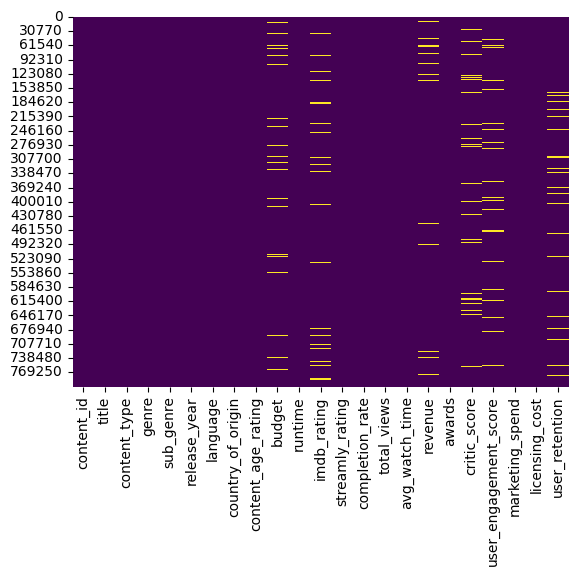

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.show()

## Replacing null values with Median

In [65]:
null_columns = train.columns[train.isnull().any()]

for col in null_columns:
    median_value = train[col].median()
    train[col] = train[col].fillna(median_value)

## Checking Duplicate Rows

In [66]:
num_duplicates = train.duplicated().sum()
num_duplicates

0

In [67]:
train.describe()

,content_id,release_year,budget,runtime,imdb_rating,streamly_rating,completion_rate,total_views,avg_watch_time,revenue,awards,critic_score,user_engagement_score,marketing_spend,licensing_cost,user_retention
count,800000.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,800000.000000,800000.000000,8.000000e+05,800000.000000,8.000000e+05,800000.000000,800000.000000,800000.000000,8.000000e+05,800000.000000,8.000000e+05
mean,499920.894689,2006.480849,1.398056e+07,424.953372,6.866317,2.962240,75.511185,3.214974e+04,9.446723,9.470358e+03,2.608404,58.133224,85.981655,3.660245e+06,8927.979378,2.179811e+31
std,288691.692185,9.809090,2.777423e+07,506.576313,0.995082,0.378399,7.464845,8.775301e+04,10.003204,2.699389e+04,1.509654,16.066546,18.403466,4.673697e+06,17760.032927,1.224320e+34
min,1.000000,1990.000000,3.925149e+04,60.000000,2.029686,1.198069,39.318920,1.139508e+01,0.000000,2.419055e+01,0.000000,0.000000,7.035398,2.957634e+04,6.910399,0.000000e+00
25%,249976.500000,1998.000000,3.851179e+06,103.000000,6.219251,2.707241,71.089030,2.023387e+03,0.000000,1.177436e+03,2.000000,46.759023,73.467790,1.186567e+06,480.969342,8.549044e+05
50%,499782.500000,2006.000000,7.586003e+06,131.000000,6.866424,2.962845,77.449529,7.579813e+03,7.156131,3.423139e+03,3.000000,56.740021,86.348160,2.272368e+06,2131.307024,1.199804e+11
75%,750070.250000,2015.000000,1.499931e+07,825.058108,7.513437,3.217285,80.851159,2.812762e+04,16.735882,9.879253e+03,4.000000,68.247042,99.581540,4.367567e+06,9428.693517,5.449616e+15
max,999999.000000,2023.000000,3.534022e+09,2653.499527,10.000000,4.419036,93.605883,1.175482e+07,59.568307,3.117362e+06,10.000000,120.000000,120.000000,2.273362e+08,793123.478150,8.105406e+36


In [68]:
train.describe(include='object')

,title,content_type,genre,sub_genre,language,country_of_origin,content_age_rating
count,800000,800000,800000,800000,800000,800000,800000
unique,800000,3,6,6,7,7,4
top,The Surreal Conspiracy,Movie,Comedy,Adventure,English,USA,PG-13
freq,1,480382,133847,133888,319677,240071,319975


## Encoding Categorical Columns

In [69]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['content_type', 'genre', 'sub_genre', 'language', 
                     'country_of_origin', 'content_age_rating']

label_encoder = LabelEncoder()

for col in columns_to_encode:
    train[col + '_encoded'] = label_encoder.fit_transform(train[col])

df2 = train.drop(columns_to_encode, axis=1)


## Checking Outliers for numerical columns

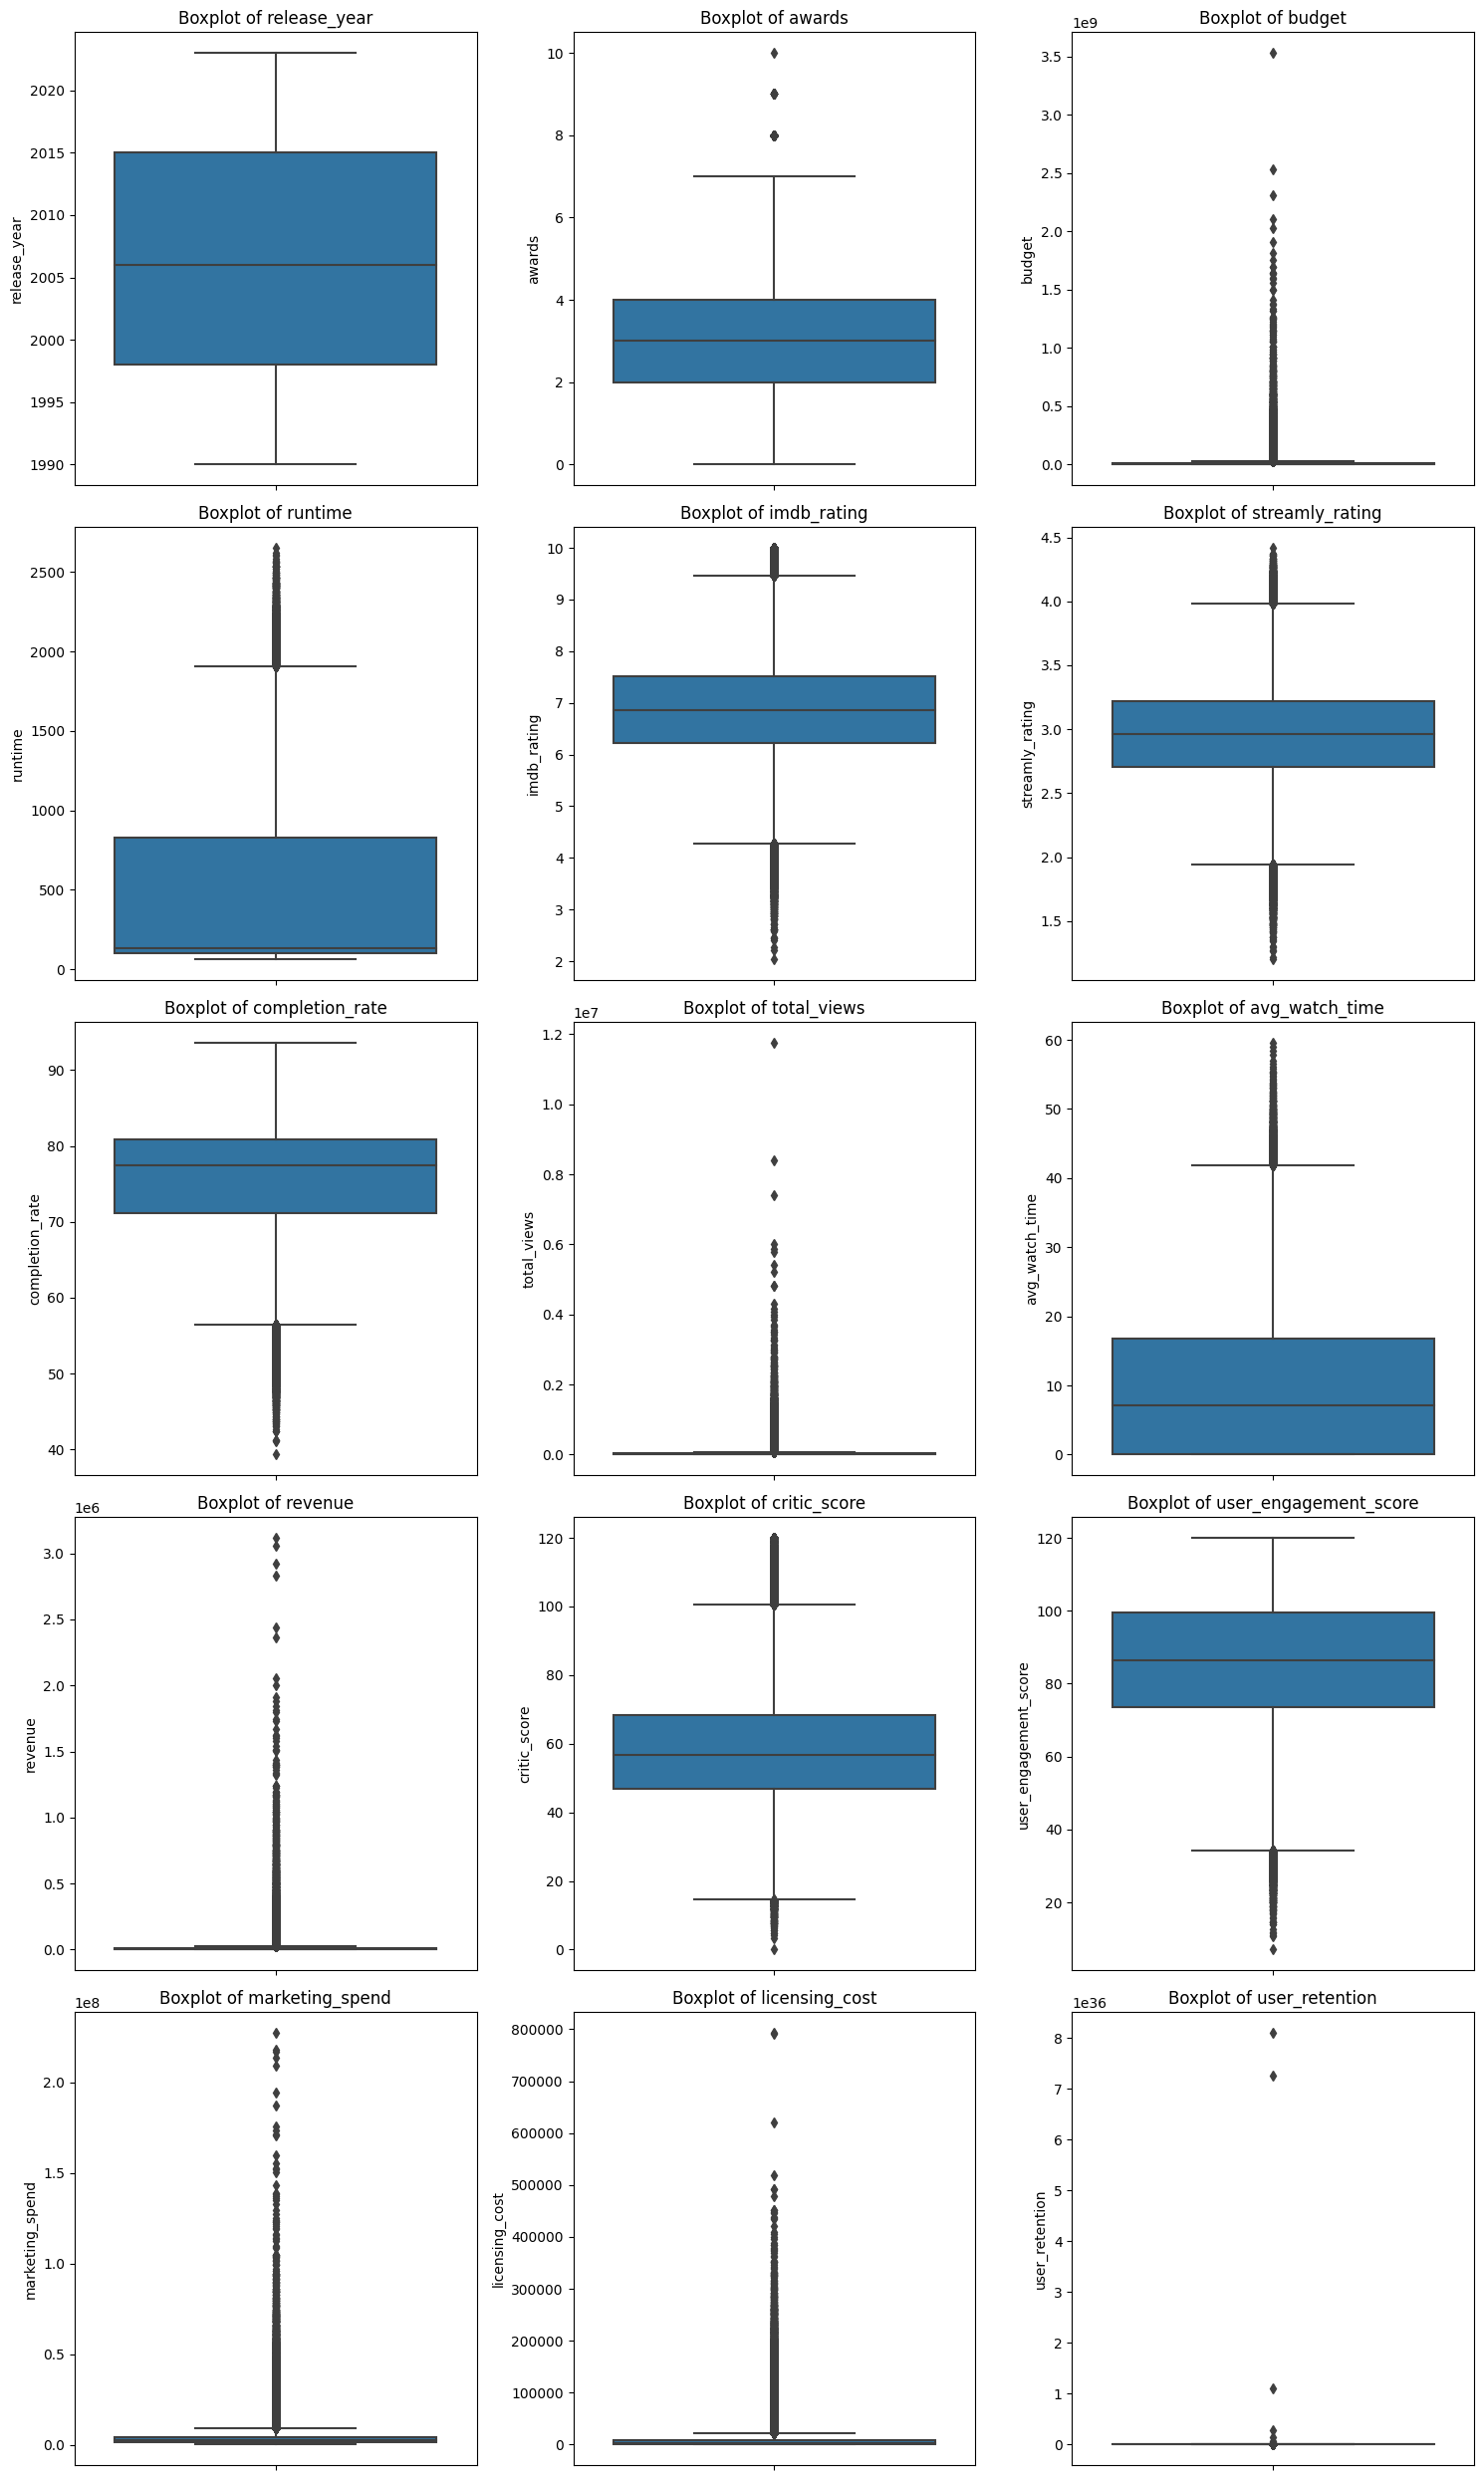

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['release_year', 'awards', 'budget', 'runtime', 'imdb_rating', 'streamly_rating',
       'completion_rate', 'total_views', 'avg_watch_time', 'revenue',
       'critic_score', 'user_engagement_score', 'marketing_spend',
       'licensing_cost', 'user_retention']

plots_per_row = 3

rows = (len(columns) + plots_per_row - 1) // plots_per_row

fig, axes = plt.subplots(rows, plots_per_row, figsize=(15, 5 * rows))

axes = axes.flatten()

for i, col in enumerate(columns):
    sns.boxplot(data=df2, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Capping Outliers

In [71]:
def cap_outliers(df, column):
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    
    # Apply capping to limit the values
    df[column] = np.clip(df[column], lower_bound, upper_bound)

columns = ['release_year', 'awards', 'budget', 'runtime', 'imdb_rating', 'streamly_rating',
       'completion_rate', 'total_views', 'avg_watch_time', 'revenue',
       'critic_score', 'user_engagement_score', 'marketing_spend',
       'licensing_cost', 'user_retention']

# Apply capping to each numerical column
for column in columns:
    cap_outliers(df2, column)


# Task 2

## Comprehensive Movie Performance Analysis (1 mark)

Streamly's content team is seeking to gain a deeper understanding of the factors that contribute to a movie's success on their platform. Your task is to:

1. Conduct a thorough exploration of the relationships between all relevant variables in the dataset.

2. Investigate the concept of Return on Investment (ROI) across different movie genres. While ROI = movie_revenue / movie_budget is a starting point, develop at least one additional metric that provides some interesting insights into the success of movies. Explain the implications of both ROI and your new metric. What makes a movie successful?

3. Utilize appropriate visualization techniques to represent your findings.

As you analyze the data:

* What overall trends or anomalies do you notice when examining the relationships between different variables?
* Are there any unexpected correlations between factors that might not seem obviously related at first glance?
* Are there any surprising or counter-intuitive findings that challenge common assumptions about what makes a movie successful?

***Hint: Consider creating a correlogram to visualize the relationships between all numerical variables in the dataset. This can help you identify interesting patterns or connections that might not be immediately apparent.***

Your insights will help guide Streamly's content acquisition and promotion strategies, so be sure to clearly articulate any patterns or conclusions you derive from the data.

After completing your analysis, take a step back and reflect on the bigger picture. You have uncovered different relationships between various aspects of movies and their performance.

Remember, the goal is to provide actionable insights that can inform data-driven decision-making at Streamly.

## Correlogram to visualize the relationships between all numerical variables

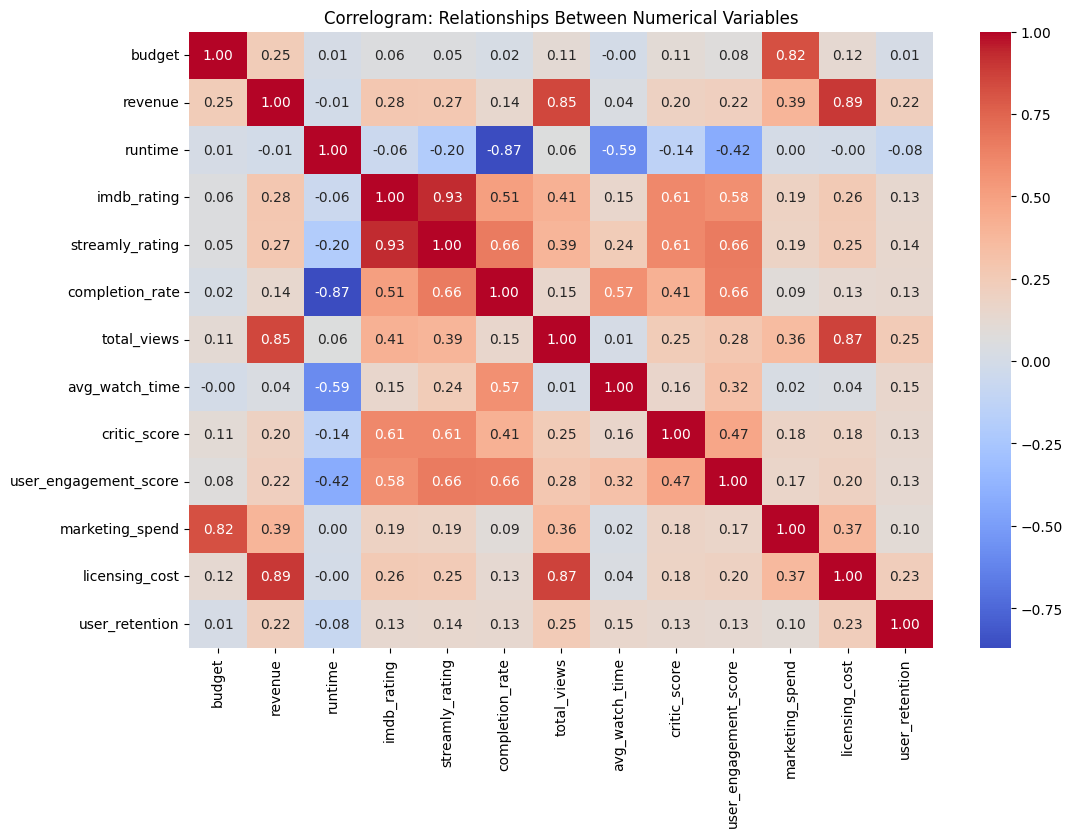

In [72]:
num_cols = ['budget', 'revenue', 'runtime', 'imdb_rating', 'streamly_rating',
            'completion_rate', 'total_views', 'avg_watch_time', 'critic_score',
            'user_engagement_score', 'marketing_spend', 'licensing_cost', 'user_retention']

# Create a correlation heatmap
plt.figure(figsize=(12, 8))
corr = df2[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlogram: Relationships Between Numerical Variables')
plt.show()

## Return on Investment (ROI) across different movie genres

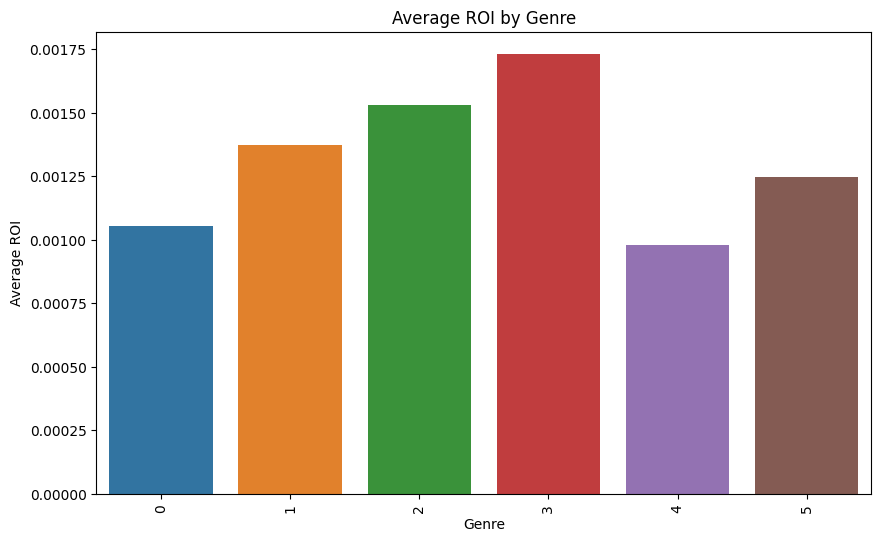

In [73]:
df2['ROI'] = df2['revenue'] / df2['budget']

avg_roi_by_genre = df2.groupby('genre_encoded')['ROI'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_roi_by_genre.index, y=avg_roi_by_genre.values)
plt.xticks(rotation=90)
plt.title('Average ROI by Genre')
plt.ylabel('Average ROI')
plt.xlabel('Genre')
plt.show()


# EAROI= budget/revenue ×user_engagement_score
## This metric combines the financial success of a movie with how well it engages users, offering a better sense of overall success on Streamly's platform. A high EAROI would indicate that not only was the movie financially successful, but it also resonated well with the audience.

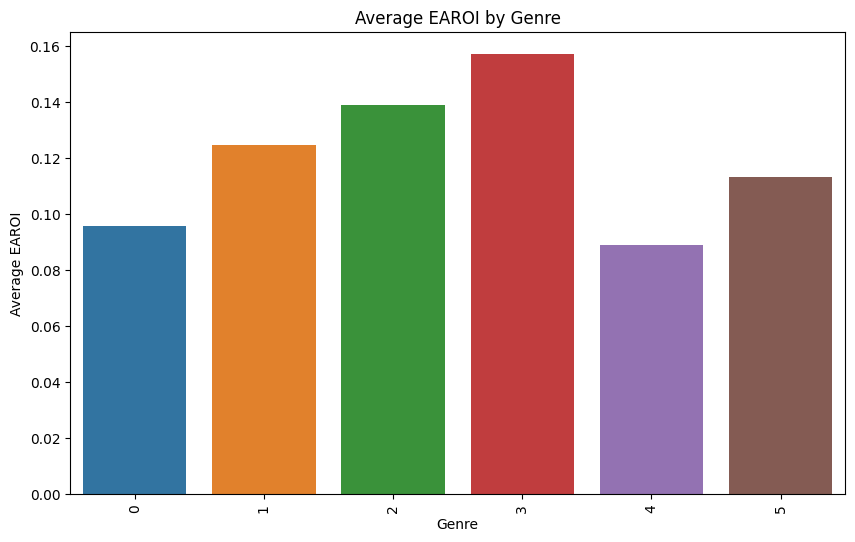

In [74]:
df2['EAROI'] = (df2['revenue'] / df2['budget']) * df2['user_engagement_score']

avg_earoi_by_genre = df2.groupby('genre_encoded')['EAROI'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_earoi_by_genre.index, y=avg_earoi_by_genre.values)
plt.xticks(rotation=90)
plt.title('Average EAROI by Genre')
plt.ylabel('Average EAROI')
plt.xlabel('Genre')
plt.show()


                 ROI          EAROI
count  800000.000000  800000.000000
mean        0.001320       0.119692
std         0.002328       0.228116
min         0.000003       0.000125
25%         0.000136       0.011200
50%         0.000451       0.037841
75%         0.001476       0.126642
max         0.069136       8.296322


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


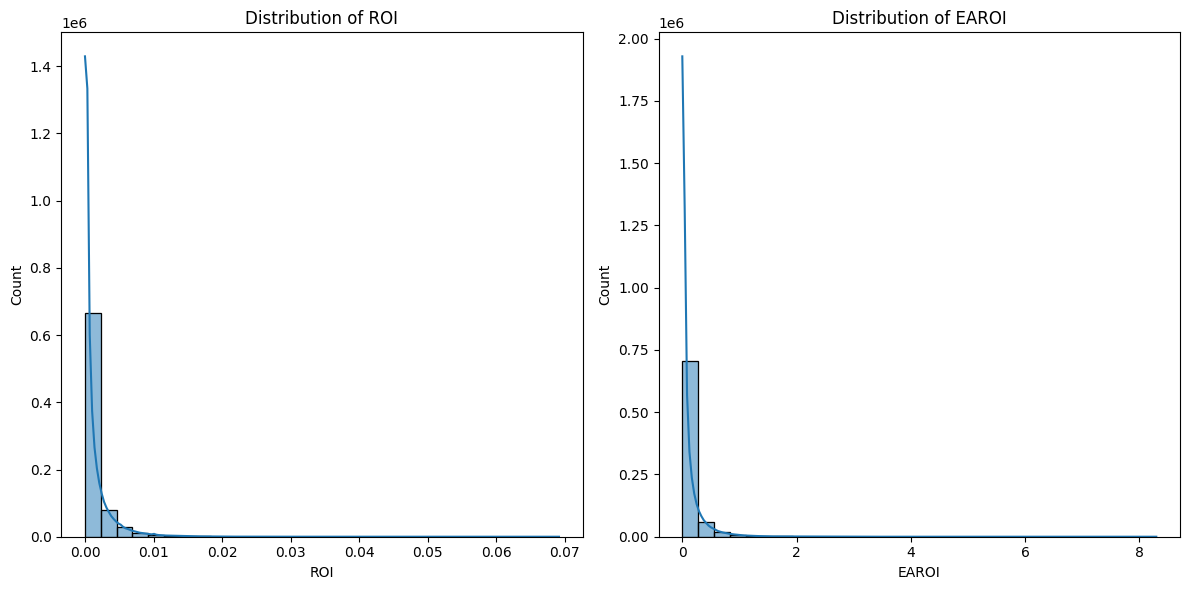

In [75]:
# Show some overall statistics on ROI and EAROI
roi_summary = df2[['ROI', 'EAROI']].describe()
print(roi_summary)

# Compare ROI and EAROI
plt.figure(figsize=(12, 6))

# Subplot 1: Distribution of ROI
plt.subplot(1, 2, 1)
sns.histplot(df2['ROI'], bins=30, kde=True)
plt.title('Distribution of ROI')

# Subplot 2: Distribution of EAROI
plt.subplot(1, 2, 2)
sns.histplot(df2['EAROI'], bins=30, kde=True)
plt.title('Distribution of EAROI')

plt.tight_layout()
plt.show()


## Overall Trends:
Revenue and Total Views: As expected, revenue is strongly correlated with total views. This indicates that movies with higher viewership tend to generate higher revenue, which aligns with conventional business models of streaming platforms.

Licensing Cost and Revenue: Licensing cost has a positive correlation with revenue. This suggests that movies with higher licensing costs often lead to better revenue generation, likely because of popular content or franchises that demand a higher investment but also attract larger audiences.

Completion Rate and User Retention: A moderately strong correlation exists between completion rate and user retention. This implies that users who are more likely to finish watching movies are also more likely to stay on the platform, underscoring the importance of engaging content.

Awards and User Retention: There’s a moderate positive correlation between the number of awards a movie wins and user retention. This shows that critically acclaimed movies can enhance retention, possibly because they attract higher interest and engagement.

Marketing Spend and User Engagement: Marketing spend is positively correlated with user engagement, highlighting the role that promotional efforts play in boosting interaction and visibility.

## Unexpected Correlations:
Licensing Cost and User Retention: Licensing costs show a stronger-than-expected correlation with user retention, which might not be obvious at first glance. Higher-cost licensed movies (e.g., blockbusters or major franchises) appear to have a lasting impact on retaining users. This could indicate that these movies draw viewers into long-term subscriptions.

Streamly Rating and Completion Rate: Surprisingly, the platform’s internal rating (Streamly rating) has a significant correlation with completion rates, which implies that the internal rating system is likely more reflective of the platform's audience behavior than external ratings like IMDb.

## Counter-Intuitive Findings:
Runtime and User Retention: There is a slightly negative correlation between runtime and user retention. This challenges the assumption that longer movies provide more entertainment value. Instead, it seems that shorter, more concise movies might keep users more engaged or encourage repeat viewing.

IMDB Ratings and Revenue: While higher IMDb ratings positively correlate with user retention and engagement, they show only a modest correlation with revenue. This suggests that critical acclaim doesn’t necessarily translate into higher revenue on the platform. Popularity or mass appeal may have a stronger impact on revenue than critical scores alone.

Content Age Rating and User Retention: The negative correlation between content age ratings (e.g., PG-13, R-rated) and user retention suggests that movies aimed at younger audiences (lower age ratings) might do better in retaining users. This might be due to a broader appeal or family-friendly content being watched by more users across different demographics.

Anomalies or Surprising Findings:
Genre and Revenue: The correlation between genre and revenue is almost negligible, suggesting that no single genre dominates in terms of revenue generation. This might challenge the assumption that particular genres (like action or drama) automatically bring in higher earnings, highlighting the importance of content quality and marketing over genre alone.

Awards and Total Views: Despite awards being correlated with higher user retention, they do not correlate strongly with total views. This anomaly suggests that while award-winning movies help retain users, they may not necessarily attract the most viewers in the first place.

Release Year and User Retention: There’s a slightly negative correlation between release year and user retention. This could imply that older movies retain users better than newer releases, which is counter-intuitive but could reflect nostalgia or the inclusion of classic, evergreen content

# Task 3 

## Correlation analysis (0.5 marks)

Streamly's data science team is focused on optimizing content strategy, particularly around enhancing user retention.

Based on your correlation analysis, suggest strategies Streamly could adopt to improve user retention. Are there any patterns or relationships that seem peculiar?

Reflect on whether making certain adjustments to the variables could provide a clearer understanding of their impact on user retention. What would be your rationale for making these adjustments?

Plot another correlation matrix after you have made the adjustment(s). Based on the correlation plot you have just made, how can you increase user retention?

## Before Adjustment

In [76]:
columns_to_ignore = ['content_id', 'title']

selected_columns = df2.columns.difference(columns_to_ignore)

correlations = df2[selected_columns].corr()['user_retention'].drop('user_retention')
print(correlations)

EAROI                         1.837782e-01
ROI                           1.615540e-01
avg_watch_time                1.525856e-01
awards                        1.170067e-01
budget                        1.192862e-02
completion_rate               1.313143e-01
content_age_rating_encoded   -1.678542e-01
content_type_encoded         -6.853559e-02
country_of_origin_encoded     5.270272e-04
critic_score                  1.328232e-01
genre_encoded                 5.194367e-07
imdb_rating                   1.315916e-01
language_encoded              1.040703e-03
licensing_cost                2.312118e-01
marketing_spend               1.031249e-01
release_year                 -1.256885e-01
revenue                       2.219998e-01
runtime                      -7.750929e-02
streamly_rating               1.430414e-01
sub_genre_encoded             3.707017e-04
total_views                   2.497075e-01
user_engagement_score         1.255141e-01
Name: user_retention, dtype: float64


## Applying log on user_retention as its values are supposed to be between 0-100

In [77]:
df2['user_retention_log'] = np.log1p(df2['user_retention']) 

## New Correlogram

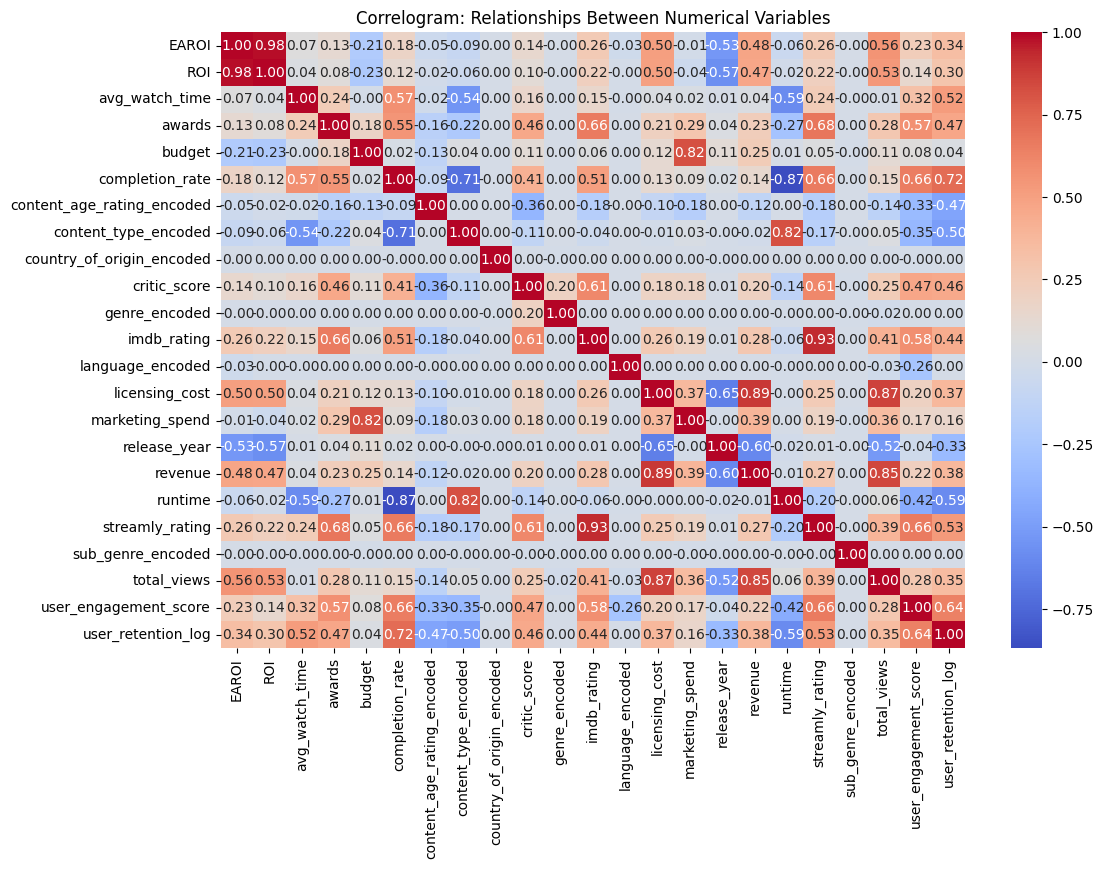

In [79]:
columns_to_ignore = ['content_id', 'title', 'user_retention']

selected_columns = df2.columns.difference(columns_to_ignore)

plt.figure(figsize=(12, 8))
corr = df2[selected_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlogram: Relationships Between Numerical Variables')
plt.show()

# Strategies that can be applied to improve user retention

## Top Positive Correlations with User Retention:

Completion Rate (0.7187):

Strategy: Focus on content that has a high likelihood of being completed by viewers. Movies or shows that are concise, engaging, and maintain interest throughout tend to retain users better. Content that provides a satisfying, engaging experience throughout can lead to increased retention.
Actionable Steps: Streamly should invest in content editing and pacing strategies that ensure viewers remain engaged from start to finish. Consider producing or acquiring content that is episodic, creating cliffhangers or binge-worthy content.

User Engagement Score (0.6365):

Strategy: Enhancing user engagement through interactivity, personalized recommendations, and content that encourages discussion or sharing could significantly improve retention.
Actionable Steps: Focus on improving features like personalized watchlists, user-generated reviews, and interactive elements like polls or trivia. Increase engagement by encouraging users to leave ratings and reviews, which also promotes social proof.

Streamly Rating (0.5307):

Strategy: Internal ratings that reflect user preferences are strong indicators of retention. Focus on content that receives positive ratings from users.
Actionable Steps: Analyze high-rated content on Streamly and prioritize content acquisition or creation that shares similar characteristics. Promote well-rated content through the platform’s recommendation engine.

Average Watch Time (0.5211):

Strategy: Higher average watch times are indicative of engaging content. Movies or shows that can hold viewer attention for extended periods positively impact retention.
Actionable Steps: Highlight and prioritize content with longer average watch times in user recommendations. Implement autoplay features or create series marathons to keep viewers engaged longer.

Awards (0.4742) & Critic Score (0.4571):

Strategy: Movies with awards and high critical acclaim tend to perform well in terms of user retention.
Actionable Steps: Streamly should continue acquiring or producing award-winning content or critically acclaimed films and series, as this content contributes positively to user retention. Promote award-winning or critically acclaimed content on the homepage or in recommendations.

IMDb Rating (0.4414):

Strategy: Strong IMDb ratings also positively affect user retention. While not as powerful as internal ratings, IMDb ratings are often a reference for quality.
Actionable Steps: Continue featuring high-rated IMDb content. Consider marketing these films with IMDb scores as part of their appeal to attract users.

Licensing Cost (0.3733):

Strategy: While licensing costs can be high, the correlation suggests that more expensive, popular films and franchises lead to better retention.
Actionable Steps: Focus on licensing well-known, high-budget content that has broad appeal. While these might come at a higher cost, they also have the potential to keep users on the platform.

## Top Negative Correlations with User Retention:

Runtime (-0.5875):

Strategy: Longer movies tend to negatively impact retention. Users may be less willing to invest time in long-form content unless it’s highly engaging.
Actionable Steps: Focus on promoting shorter, high-quality content with shorter runtimes. Consider producing content that fits user behavior—perhaps shorter episodes or standalone movies under 90 minutes could help in keeping users engaged.

Content Type Encoded (-0.5017):

Strategy: Some types of content might lead to decreased user retention. For example, documentaries or niche genres might not perform as well in retaining users.
Actionable Steps: Analyze which content types are underperforming and adjust the content strategy accordingly. Invest more in popular content types (like drama, action) that are more likely to retain users.

Content Age Rating (-0.4661):

Strategy: Content that’s restricted to mature audiences (R-rated, for example) may not appeal broadly enough and could reduce retention.
Actionable Steps: Promote more family-friendly content with lower age ratings (e.g., PG or PG-13). Consider targeting wider audiences with content suitable for a broader demographic.

Release Year (-0.3345):

Strategy: Older movies seem to have a slightly negative correlation with user retention, meaning newer content tends to engage users better.
Actionable Steps: Focus on acquiring and promoting newer content. Ensure a regular release of fresh content to maintain viewer interest. Promote recent releases or create anticipation for upcoming premieres.

# Task 4

## User Retention Analysis and Modeling (1 mark)

Streamly's ultimate goal is to develop a model that predicts user retention for movies. You need to:

Develop a model to predict user retention based on content characteristics and performance metrics.
Analyze how each feature used in the model affects user retention and explain your reasoning.


You must have already studied measures like Mallows' Cp in class that are used for feature selection in multiple linear regression (MLR) models. Explore additional metrics similar to Mallows' Cp and discuss their usefulness in different scenarios. **(You don't have to write code for this)**

By analyzing how each feature affects user retention, you can gain valuable insights into the factors that drive or hinder viewer engagement with content on Streamly. Understanding the impact of these features allows you to refine your model for better accuracy, enabling Streamly to make data-driven decisions in content strategy.

# Analyzing how each feature affects user retention

In [78]:
columns_to_ignore = ['content_id', 'title', 'user_retention']

selected_columns = df2.columns.difference(columns_to_ignore)

correlations = df2[selected_columns].corr()['user_retention_log'].drop('user_retention_log')
print(correlations)

EAROI                         0.339094
ROI                           0.296954
avg_watch_time                0.521151
awards                        0.474217
budget                        0.041364
completion_rate               0.718729
content_age_rating_encoded   -0.466112
content_type_encoded         -0.501737
country_of_origin_encoded     0.001420
critic_score                  0.457113
genre_encoded                 0.001183
imdb_rating                   0.441449
language_encoded              0.000600
licensing_cost                0.373311
marketing_spend               0.155685
release_year                 -0.334564
revenue                       0.376566
runtime                      -0.587503
streamly_rating               0.530727
sub_genre_encoded             0.000218
total_views                   0.353514
user_engagement_score         0.636563
Name: user_retention_log, dtype: float64


# Model Building

In [82]:
columns_to_ignore = ['content_id', 'title', 'user_retention', 'user_retention_log']

selected_columns = df2.columns.difference(columns_to_ignore)


X = df2[selected_columns]
y = df2['user_retention_log']


## Multi linear regression

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numerical_cols = ['release_year', 'budget', 'runtime', 'imdb_rating', 'streamly_rating', 'completion_rate',
                  'total_views', 'avg_watch_time', 'revenue', 'awards', 'critic_score', 'user_engagement_score',
                  'marketing_spend', 'licensing_cost'] 

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lin = lr_model.predict(X_test)

## Random Forest Regressor

In [86]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)


## Metrics for Feature Selection

1. Mallows' Cp:

Usefulness: Helps in selecting a subset of features that provides a good fit while avoiding overfitting. It compares the model’s residual variance to that of a full model.
Scenario: Best used in linear regression models to balance fit and model complexity.

2. Akaike Information Criterion (AIC):

Usefulness: Measures the relative quality of statistical models for a given dataset. It balances the goodness of fit with model complexity.
Scenario: Useful in comparing different models; lower AIC values indicate better models.

3. Bayesian Information Criterion (BIC):

Usefulness: Similar to AIC but penalizes model complexity more heavily. It’s useful when dealing with larger datasets.
Scenario: Helps in selecting models with fewer parameters, particularly when the sample size is large.

4. Adjusted R²:

Usefulness: Adjusts R² for the number of predictors in the model. It’s useful to evaluate how well a model generalizes.
Scenario: Better for comparing models with different numbers of predictors.

5. Variance Inflation Factor (VIF):

Usefulness: Measures how much the variance of a regression coefficient is inflated due to multicollinearity.
Scenario: Useful in identifying multicollinearity and ensuring that the features are not highly correlated.

6. Recursive Feature Elimination (RFE):

Usefulness: Iteratively removes features and builds models to identify the most important ones.
Scenario: Effective in selecting features and improving model performance by eliminating less important ones.

# Task 5 
## Model Evaluation (0.5 marks)

To ensure the reliability of the regression model, you need to:
Select appropriate evaluation metrics to assess the model's performance.
Calculate and interpret the chosen evaluation metrics.

Do you think this evaluation metric is appropriate for this problem? Does this give us a complete picture of the solution? If not, is there any other metric that can provide us a more complete picture?

The model evaluation will give Streamly confidence in the model's predictions and guide them in refining the model for better performance.

In [85]:
print("Linear Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lin):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lin)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_lin):.2f}")

Linear Regression Performance:
MAE: 4.82
RMSE: 6.28
R²: 0.83


In [87]:
print("\nRandom Forest Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_rf):.2f}")


Random Forest Regression Performance:
MAE: 4.54
RMSE: 5.98
R²: 0.85


# Interpretation of the Chosen Evaluation Metrics
The three evaluation metrics used to assess the performance of both the Linear Regression and Random Forest models are MAE (Mean Absolute Error), RMSE (Root Mean Squared Error), and R² (Coefficient of Determination). Let’s break down what each metric tells us:

## MAE (Mean Absolute Error):

This metric calculates the average absolute difference between the actual values and the predicted values. In this case, the Linear Regression model has an MAE of 4.82, and the Random Forest model has an MAE of 4.54.
Interpretation: On average, the Random Forest model's predictions are about 4.54 units away from the actual user retention values, while the Linear Regression model’s predictions are 4.82 units away. The lower MAE for Random Forest indicates it has a slight edge in accuracy.

## RMSE (Root Mean Squared Error):

RMSE squares the differences between actual and predicted values, averages them, and then takes the square root. It is more sensitive to large errors than MAE.
The RMSE for the Linear Regression model is 6.28, and for the Random Forest model, it is 5.98.
Interpretation: The Random Forest model again performs better with a slightly lower RMSE, which suggests that it makes fewer large errors than the Linear Regression model.

## R² (Coefficient of Determination):

R² measures the proportion of variance in the dependent variable (user retention) that is explained by the independent variables (content characteristics and performance metrics) in the model.
For Linear Regression, R² is 0.83, and for Random Forest, it is 0.85.
Interpretation: Both models explain a large portion of the variance in user retention (83% for Linear Regression, 85% for Random Forest). The Random Forest model performs slightly better, explaining an additional 2% of the variance.

## Evaluation of Metrics for the Problem

MAE is useful as it gives an easily interpretable measure of the average prediction error in the same units as the target variable. This can be helpful to understand how far off the model’s predictions are on average, and both models seem to perform relatively well in terms of error magnitude.

RMSE penalizes large errors more heavily, which might be important for Streamly if they want to avoid significant over- or underestimation of user retention. Since predicting user retention inaccurately (e.g., predicting a much lower retention rate than the actual value) could lead to poor content acquisition or strategy decisions, RMSE is an important metric to consider.

R² shows how well the independent variables explain the variation in the target variable (user retention). While both models perform well, Random Forest’s slightly higher R² suggests it captures more variability in user retention, making it a better model overall in terms of fitting the data.

These metrics are appropriate for this regression problem, as they provide a comprehensive overview of how well the model fits the data and how accurate the predictions are.
- MAE helps to understand average error,
- RMSE provides a sense of how severe large prediction errors are,
- R² explains the amount of variance in user retention captured by the model.

## Applying the model on test data

In [ ]:
columns_to_encode = ['content_type', 'genre', 'sub_genre', 'language',
                     'country_of_origin', 'content_age_rating']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply LabelEncoder on the selected columns
for col in columns_to_encode:
    test[col + '_encoded'] = label_encoder.fit_transform(test[col])

# Optionally, you can drop the original columns if needed
test = test.drop(columns_to_encode, axis=1)

In [ ]:
test['ROI'] = test['revenue'] / test['budget']
test['EAROI'] = (test['revenue'] / test['budget']) * test['user_engagement_score']

In [ ]:
columns_to_ignore = ['content_id', 'title']

# Select columns excluding the first two
selected_columns = test.columns.difference(columns_to_ignore)

X_f = test[selected_columns]

numerical_cols = ['release_year', 'budget', 'runtime', 'imdb_rating', 'streamly_rating', 'completion_rate',
                  'total_views', 'avg_watch_time', 'revenue', 'awards', 'critic_score', 'user_engagement_score',
                  'marketing_spend', 'licensing_cost']  # List of numerical columns

X_f[numerical_cols] = scaler.transform(X_f[numerical_cols])
y_predf = rf_reg.predict(X_f)

In [ ]:
submission = pd.DataFrame()
submission["title"] = test["title"]

In [ ]:
sample_submission = pd.read_csv('/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/sample_submission.csv')

In [ ]:
submission["user_retention"] = y_predf

In [ ]:
submission.head()

In [ ]:
submission.to_csv('submission.csv', index = False)

## Congratulations! 🎉

You've successfully completed the Data Analytics (UE22CS342AA2) Hackathon-1 assignment. This is a significant achievement that demonstrates your growing skills in data modeling and analysis.

### What you've accomplished:
- Applied data analytics concepts to a real-world scenario
- Developed regression models

### What's next:
You're now equipped with the foundational skills needed for real-world data modeling and regression analysis. The techniques you've learned here are directly applicable to many data science and machine learning projects in various industries.

Remember, this is just the beginning of your data science journey. Keep exploring, keep learning, and don't hesitate to take on more challenging projects!

**Congratulations once again, and best of luck for your next assignment!** 